# **Análise de Dados** <p>
**por: @Manuel Viana** - <p>
[Página do Curso](https://)

# **Estatística Descritiva**
Na essência, a Estatística é a ciência que apresenta processos próprios para recolher,
apresentar e interpretar adequadamente conjuntos de dados, sejam eles numéricos ou não. Pode-se dizer que o seu objetivo é o de apresentar informações sobre dados em análise para que se tenha maior compreensão dos fatos que os mesmos representam.<p>
A **estatística descritiva**, como o próprio nome já diz, se preocupa em descrever os dados.<p>
Referência: http://www.each.usp.br/rvicente/Guedes_etal_Estatistica_Descritiva.pdf

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [42]:
# to use unverified certificates
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Leitura da Base de Dados
Base_Dados = sns.load_dataset('iris')

# Primeiros registros
print(Base_Dados.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# **Módulo 1 - Medidas de tendência central**
As medidas de tendência central são assim denominadas por indicarem um ponto em torno do qual se concentram os dados.


**Média aritmética** <p>
A média aritmética (X) é a soma de todos os valores observados da variável dividida pelo número total de observações.

In [43]:
media = Base_Dados['petal_length'].mean()
print(f'Média: {media}')

Média: 3.7580000000000005


**Moda** <p>
A moda (Mo) é o valor que apresenta a maior frequência da variável entre os valores observados.

In [44]:
moda = Base_Dados['petal_length'].mode()
print(f'Moda: {moda.tolist()}')

Moda: [1.4, 1.5]


**Mediana** <p>
A mediana (Md) é o valor que ocupa a posição central da série de observações de uma variável, em rol, dividindo o conjunto em duas partes iguais, ou seja, a quantidade de valores inferiores à mediana é igual à quantidade de valores superiores a mesma. 

In [45]:
mediana = Base_Dados['petal_length'].median()
print(f'Mediana: {mediana}')

Mediana: 4.35


# **Módulo 2 - Medidas de divisão da amostra** <p>
Estas medidas são valores que ocupam posições no conjunto de dados, em rol, dividindo-o
em partes iguais e podem ser:
1. Quartil: Os quartis dividem o conjunto de dados em quatro partes iguais.
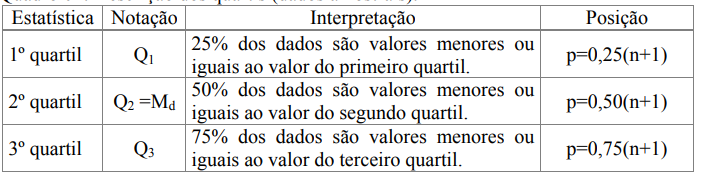

In [46]:
# Describe
Base_Dados['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

<Axes: ylabel='sepal_length'>

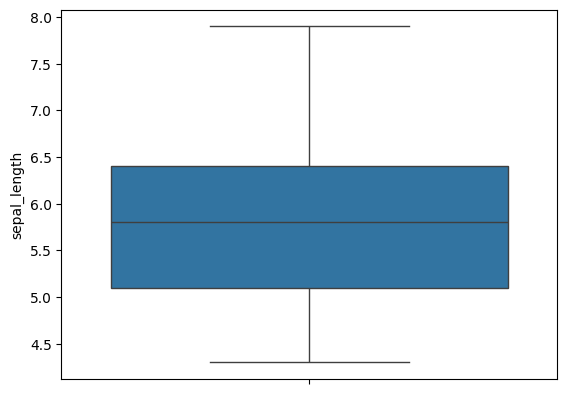

In [47]:
# Plot do Boxplot
sns.boxplot( Base_Dados['sepal_length'] )

# **Módulo 3 - Medidas de dispersão** <p>
 As medidas de dispersão auxiliam as medidas de tendência central a descrever o conjunto de dados adequadamente. Indicam se os dados estão, ou não, próximos uns dos outros.

**Amplitude Total** <p>
A amplitude total de um conjunto de dados é a diferença entre o maior e o menor valor observados.

In [48]:
Base_Dados['sepal_length'].max() - Base_Dados['sepal_length'].min()

np.float64(3.6000000000000005)

**Amplitude Interquartil** <p>
A amplitude interquartil é a diferença entre o terceiro e o primeiro quartil. Esta medida é mais estável que a amplitude total por não considerar os valores mais extremos

In [49]:
Base_Dados['sepal_length'].describe()[6:7].values - Base_Dados['sepal_length'].describe()[4:5].values

array([1.3])

**Amplitude semi-interquartil** <p>
A amplitude semi-interquartil é definida como a média aritmética da
diferença entre a mediana e os quartis.

In [50]:
(Base_Dados['sepal_length'].describe()[6:7].values - Base_Dados['sepal_length'].describe()[4:5].values) / 2

array([0.65])

**Variância** <p> Uma medida de dispersão que mostra quão distantes os valores estão da média


In [51]:
Base_Dados['sepal_length'].var()

np.float64(0.6856935123042507)

**Desvio padrão** <p>
é simplesmente o resultado positivo da raiz quadrada da variância. 

In [52]:
Base_Dados['sepal_length'].std()

np.float64(0.828066127977863)

**Medidas de Assimetria** <p> 
A medida de assimetria é um indicador da forma da distribuição dos dados. Ao construir uma distribuição de freqüências e/ou um histograma, está-se buscando, também, identificar visualmente, a forma da distribuição dos dados

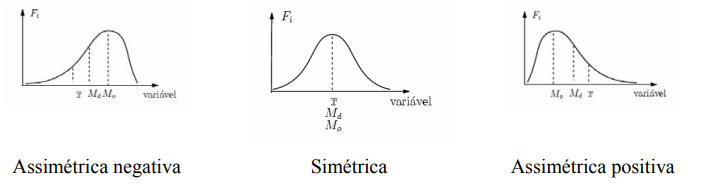

**Simétrica** se média = mediana = moda ou As = 0 <p>
**Assimétrica** negativa se média ≤ mediana ≤ moda As < 0 <p>
**Assimétrica** positiva se moda ≤ mediana ≤ média ou As > 0

In [53]:
Base_Dados['sepal_length'].skew()

np.float64(0.3149109566369728)

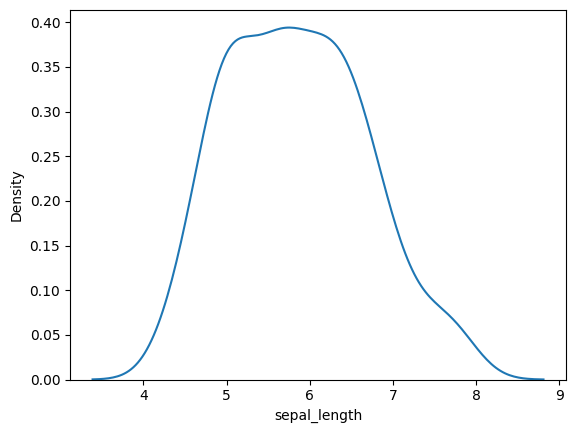

In [54]:
sns.kdeplot( Base_Dados['sepal_length'] );

**Medidas de Curtose** <p>
A medida de curtose é o grau de achatamento da distribuição, é um indicador da forma desta distribuição

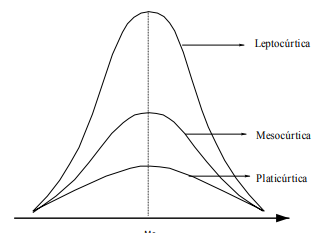

**Leptocúrtica**: quando a distribuição apresenta uma curva de frequência bastante fechada, com os dados fortemente concentrados em torno de seu centro, K < 0,263. <p>
**Mesocúrtica**: quando os dados estão razoavelmente concentrados em torno de seu centro, K= 0,263 <p>
**Platicúrtica**: quando a distribuição apresenta uma curva de frequência mais aberta, com os dados fracamente concentrados em torno de seu centro, K > 0,263. 

In [55]:
Base_Dados['sepal_length'].kurtosis()

np.float64(-0.5520640413156395)

# **Módulo 4 - Correlação** <p>
**Quando fazer análise de correlação?** <p>
Quando tem uma hipótese de que o aumento ou queda em uma variável estão associados à evolução de outra variável, por exemplo, se aumentar o desconto, as vendas também aumentam.

**Correlação de Pearson**
<p>
O coeficiente de correlação de Pearson pode ter um intervalo de valores de +1 a -1. Um valor de 0 indica que não há associação entre as duas variáveis. Um valor maior que 0 indica uma associação positiva. Isto é, à medida que o valor de uma variável aumenta, o mesmo acontece com o valor da outra variável. Um valor menor que 0 indica uma associação negativa. Isto é, à medida que o valor de uma variável aumenta, o valor da outra diminui.

In [56]:
numeric_data = Base_Dados.select_dtypes(include=['number'])
corr_numeric = numeric_data.corr()
print(corr_numeric)


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


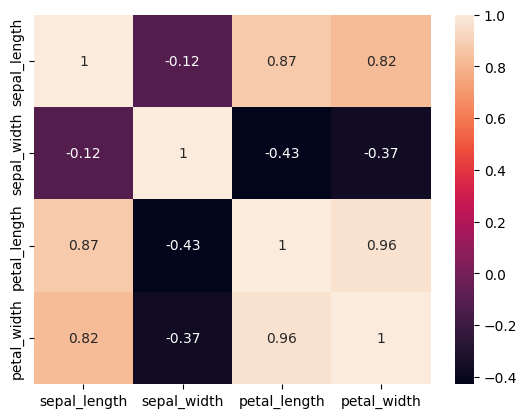

In [57]:
sns.heatmap(corr_numeric, annot=True)
plt.show()

<Axes: xlabel='petal_length', ylabel='petal_width'>

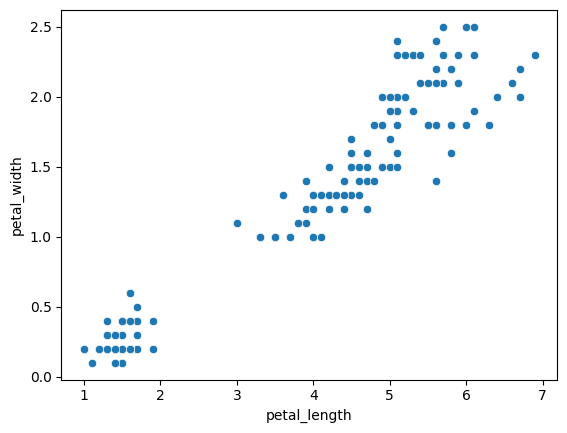

In [58]:
sns.scatterplot( data=Base_Dados, x='petal_length', y='petal_width')

**Correlação de Spearman** <p>
Uma vez que a correlação de Spearman segue uma lógica monotética, e não tem pressupostos lineares como na correlação de Pearson, é possível utilizar o rs para relações não lineares

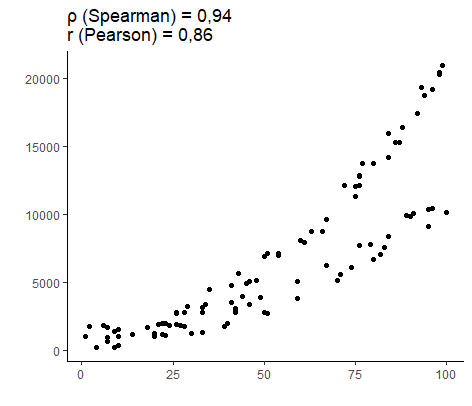

In [59]:
# Selecionar apenas as colunas numéricas
numeric_data = Base_Dados.select_dtypes(include=['number'])

# Calcular a correlação de Spearman para as colunas numéricas
corr_spearman = numeric_data.corr(method='spearman')
print(corr_spearman)


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.166778      0.881898     0.834289
sepal_width      -0.166778     1.000000     -0.309635    -0.289032
petal_length      0.881898    -0.309635      1.000000     0.937667
petal_width       0.834289    -0.289032      0.937667     1.000000


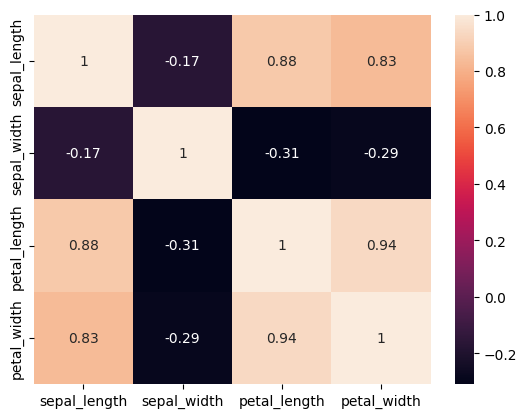

In [60]:
# Seleciona apenas as colunas numéricas
numeric_data = Base_Dados.select_dtypes(include=['number'])

# Calcula a correlação de Spearman para as colunas numéricas
corr_spearman = numeric_data.corr(method='spearman')

# Plota o heatmap
sns.heatmap(corr_spearman, annot=True)
plt.show()


<Axes: xlabel='sepal_length', ylabel='petal_width'>

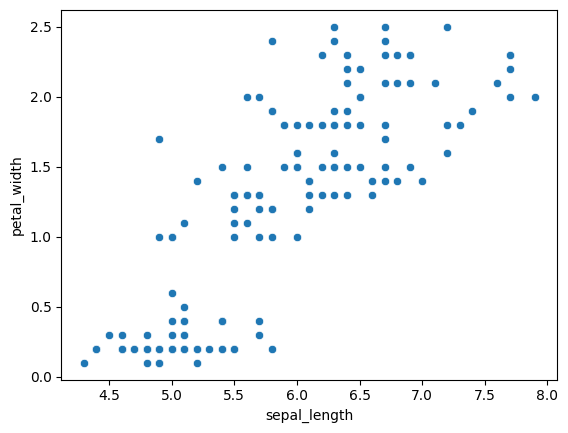

In [61]:
sns.scatterplot( data=Base_Dados, x='sepal_length', y='petal_width')